In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle

from tensorflow.keras import models
from tensorflow.keras import layers

X = np.load("../db/x51.npy")
Y = np.load("../db/y51.npy")

transformer = Normalizer().fit(X)
X = transformer.transform(X) # normalizes data according to columns

X, Y = shuffle(X, Y, random_state=0) # shuffle the samples

X = np.reshape(X, (3230, 6, 51), order='F')
# np.save("x_time.npy", x_time)

X_train = X[:3000]
Y_train = Y[:3000]


X_test = X[3000:]
Y_test = Y[3000:]

print("Input training tensor: " + str(X_train.shape))
print("Label training tensor: " + str(Y_train.shape) + "\n")

# 559 test/validation samples
print("Input validation tensor: " + str(X_test.shape))
print("Label validation tensor: " + str(Y_test.shape))

Input training tensor: (3000, 6, 51)
Label training tensor: (3000,)

Input validation tensor: (230, 6, 51)
Label validation tensor: (230,)


In [3]:
rnn = models.Sequential()
rnn.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
rnn.add(layers.Bidirectional(layers.LSTM(64)))
rnn.add(layers.Dense(1, activation='sigmoid'))

rnn.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

history = rnn.fit(
                X_train,
                Y_train,
                epochs=200,
                batch_size=30,
                validation_data=(X_test,Y_test)
                )

history_dict = history.history
rnn.summary()

print("Training accuracy: " + str(history_dict['accuracy'][-1]))
print("Training loss: " + str(history_dict['loss'][-1]) + "\n")

print("Validation accuracy: " + str(history_dict['val_accuracy'][-1]))
print("Validation loss: " + str(history_dict['val_loss'][-1]))

Epoch 1/200
100/100 [==============================] - 3s 34ms/step - loss: 0.6565 - accuracy: 0.5970 - val_loss: 0.6292 - val_accuracy: 0.6261
Epoch 2/200
100/100 [==============================] - 1s 12ms/step - loss: 0.6025 - accuracy: 0.6700 - val_loss: 0.6183 - val_accuracy: 0.6652
Epoch 3/200
100/100 [==============================] - 1s 12ms/step - loss: 0.5859 - accuracy: 0.6780 - val_loss: 0.6234 - val_accuracy: 0.6217
Epoch 4/200
100/100 [==============================] - 1s 12ms/step - loss: 0.5745 - accuracy: 0.6993 - val_loss: 0.6410 - val_accuracy: 0.6652
Epoch 5/200
100/100 [==============================] - 1s 13ms/step - loss: 0.5620 - accuracy: 0.7007 - val_loss: 0.5867 - val_accuracy: 0.6870
Epoch 6/200
100/100 [==============================] - 1s 14ms/step - loss: 0.5508 - accuracy: 0.7117 - val_loss: 0.6044 - val_accuracy: 0.6783
Epoch 7/200
100/100 [==============================] - 1s 13ms/step - loss: 0.5446 - accuracy: 0.7347 - val_loss: 0.5867 - val_accuracy:

100/100 [==============================] - 1s 14ms/step - loss: 0.3848 - accuracy: 0.8187 - val_loss: 0.5421 - val_accuracy: 0.7826
Epoch 114/200
100/100 [==============================] - 1s 13ms/step - loss: 0.3807 - accuracy: 0.8200 - val_loss: 0.5493 - val_accuracy: 0.7348
Epoch 115/200
100/100 [==============================] - 1s 12ms/step - loss: 0.3839 - accuracy: 0.8183 - val_loss: 0.5750 - val_accuracy: 0.7478
Epoch 116/200
100/100 [==============================] - 1s 13ms/step - loss: 0.3867 - accuracy: 0.8190 - val_loss: 0.5624 - val_accuracy: 0.7696
Epoch 117/200
100/100 [==============================] - 1s 12ms/step - loss: 0.3862 - accuracy: 0.8227 - val_loss: 0.5413 - val_accuracy: 0.7696
Epoch 118/200
100/100 [==============================] - 1s 12ms/step - loss: 0.3863 - accuracy: 0.8127 - val_loss: 0.5242 - val_accuracy: 0.7696
Epoch 119/200
100/100 [==============================] - 1s 12ms/step - loss: 0.3792 - accuracy: 0.8263 - val_loss: 0.5648 - val_accuracy:

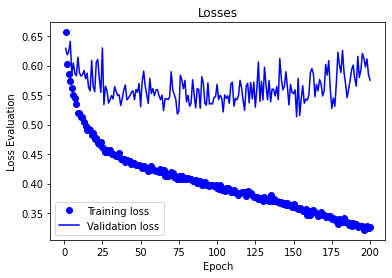

<Figure size 432x288 with 0 Axes>

In [4]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss Evaluation')
plt.legend()
plt.show()

plt.clf()

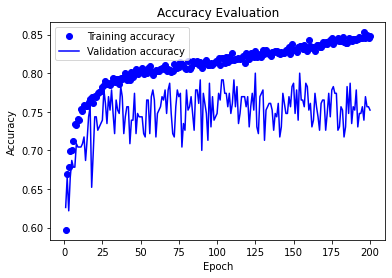

<Figure size 432x288 with 0 Axes>

In [5]:
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Accuracy Evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.clf()